In [ ]:
# Feature description

#    Age (numeric)
#    Sex (text: male, female)
#    Job (numeric: 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled)
#    Housing (text: own, rent, or free)
#    Saving accounts (text - little, moderate, quite rich, rich)
#    Checking account (numeric, in DM - Deutsch Mark)
#    Credit amount (numeric, in DM)
#    Duration (numeric, in month)
#    Purpose (text: car, furniture/equipment, radio/TV, domestic appliances, repairs, education, business, vacation/others)


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile

#### Read the dataset

In [3]:
df = pd.read_csv('german_credit_risk.zip',compression='zip')
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [4]:
df.shape  # rows = 1000,cols= 11

# Good risk : 

# Bad risk : 

(1000, 11)

In [5]:
nv = df.isnull().sum()
nv = nv[nv>0]
nv

Saving accounts     183
Checking account    394
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.describe()

,Unnamed: 0,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,35.546000,1.904000,3271.258000,20.903000
std,288.819436,11.375469,0.653614,2822.736876,12.058814
min,0.000000,19.000000,0.000000,250.000000,4.000000
25%,249.750000,27.000000,2.000000,1365.500000,12.000000
50%,499.500000,33.000000,2.000000,2319.500000,18.000000
75%,749.250000,42.000000,2.000000,3972.250000,24.000000
max,999.000000,75.000000,3.000000,18424.000000,72.000000


In [8]:
df['Unnamed: 0'].nunique()

1000

In [9]:
df.drop('Unnamed: 0',axis=1,inplace=True)
df.shape

(1000, 10)

In [10]:
df.dtypes

Age                  int64
Sex                 object
Job                  int64
Housing             object
Saving accounts     object
Checking account    object
Credit amount        int64
Duration             int64
Purpose             object
Risk                object
dtype: object

In [11]:
nv

Saving accounts     183
Checking account    394
dtype: int64

In [12]:
df['Saving accounts'].value_counts()

little        603
moderate      103
quite rich     63
rich           48
Name: Saving accounts, dtype: int64

In [13]:
df['Checking account'].value_counts()

little      274
moderate    269
rich         63
Name: Checking account, dtype: int64

In [14]:
df['Risk'].value_counts()

good    700
bad     300
Name: Risk, dtype: int64

In [15]:
df.groupby(['Risk','Saving accounts'])['Saving accounts'].count()

Risk  Saving accounts
bad   little             217
      moderate            34
      quite rich          11
      rich                 6
good  little             386
      moderate            69
      quite rich          52
      rich                42
Name: Saving accounts, dtype: int64

In [16]:
df.groupby(['Risk','Checking account'])['Checking account'].count()

Risk  Checking account
bad   little              135
      moderate            105
      rich                 14
good  little              139
      moderate            164
      rich                 49
Name: Checking account, dtype: int64

In [17]:
df['Saving accounts'] = df['Saving accounts'].fillna(df['Saving accounts'].mode()[0])

In [18]:
mode_by_risk = np.where(df['Risk']=='bad','little','moderate')
print(mode_by_risk.shape)

(1000,)


In [19]:
mode_by_risk1 = df.groupby(['Risk'])['Checking account'].transform(lambda x : x.mode()[0])
print(mode_by_risk1.shape)

(1000,)


In [20]:
from collections import Counter
Counter(mode_by_risk)

Counter({'moderate': 700, 'little': 300})

In [21]:
from collections import Counter
Counter(mode_by_risk1)

Counter({'moderate': 700, 'little': 300})

In [22]:
rbr = pd.DataFrame({'MBR':mode_by_risk,'MBR1':mode_by_risk1})
rbr['IsSame'] = rbr['MBR'] == rbr['MBR1']
rbr.head()

,MBR,MBR1,IsSame
0,moderate,moderate,True
1,little,little,True
2,moderate,moderate,True
3,moderate,moderate,True
4,little,little,True


In [23]:
rbr['IsSame'].value_counts()

True    1000
Name: IsSame, dtype: int64

In [24]:
df['Checking account'] = df['Checking account'].fillna(mode_by_risk1)

In [25]:
df.isnull().sum()

Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
Risk                0
dtype: int64

#### Cat and Num feat

In [26]:
# cat_feat = df.dtyes[df.dtypes=='object'].index
cat_feat = df.select_dtypes(include='object').columns
num_feat = df.select_dtypes(exclude='object').columns
print(cat_feat)
print(num_feat)

Index(['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose',
       'Risk'],
      dtype='object')
Index(['Age', 'Job', 'Credit amount', 'Duration'], dtype='object')


#### EDA

#### Univariate Analysis - cat feat

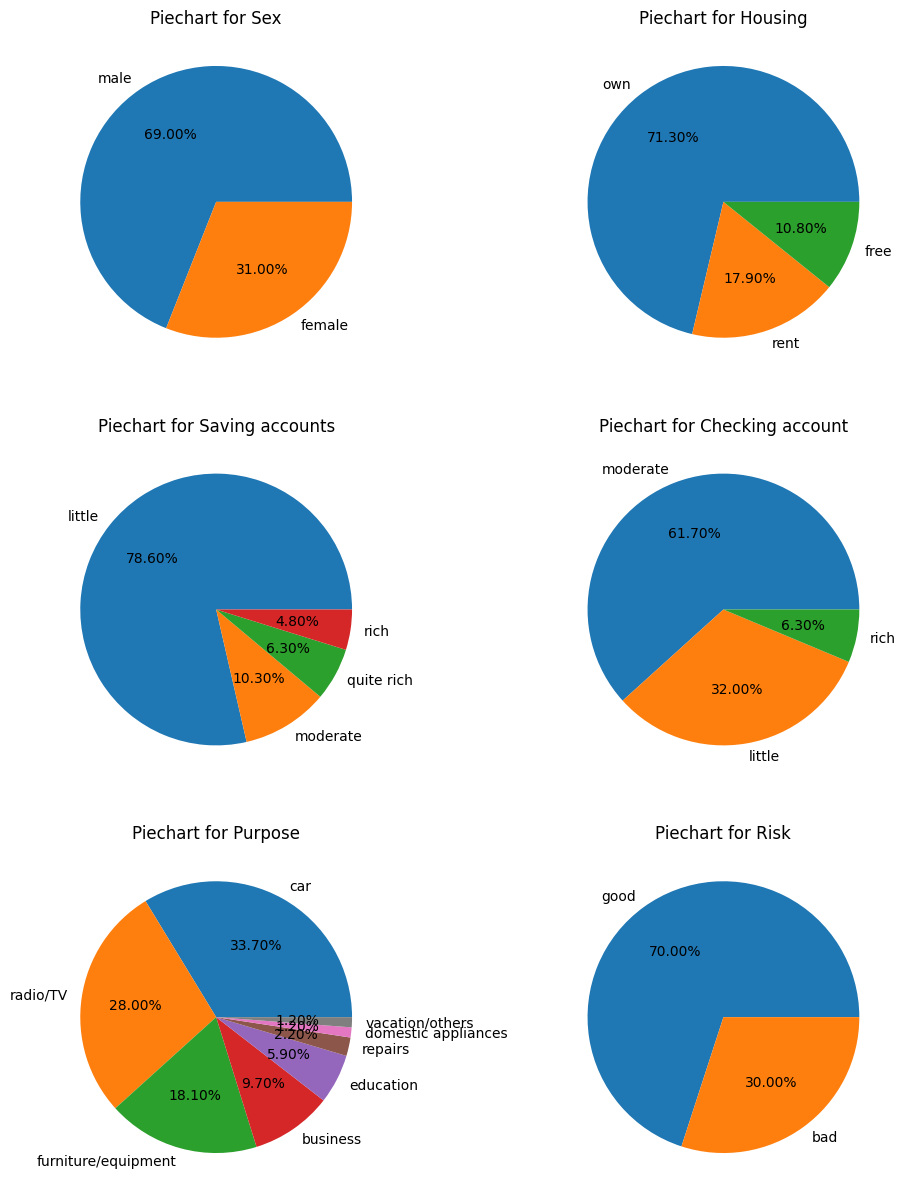

In [27]:
plt.figure(figsize=(12,15))
for i in range(len(cat_feat)):
    plt.subplot(3,2,i+1)
    x = df[cat_feat[i]].value_counts()
    plt.pie(x.values,labels=x.index,autopct='%.2f%%')
#     ax = sns.countplot(x=df[cat_feat[i]])
#     ax.bar_label(ax.containers[0])
    plt.title(f'Piechart for {cat_feat[i]}')
plt.show()

#### Bivariate Analysis - Cat-Cat

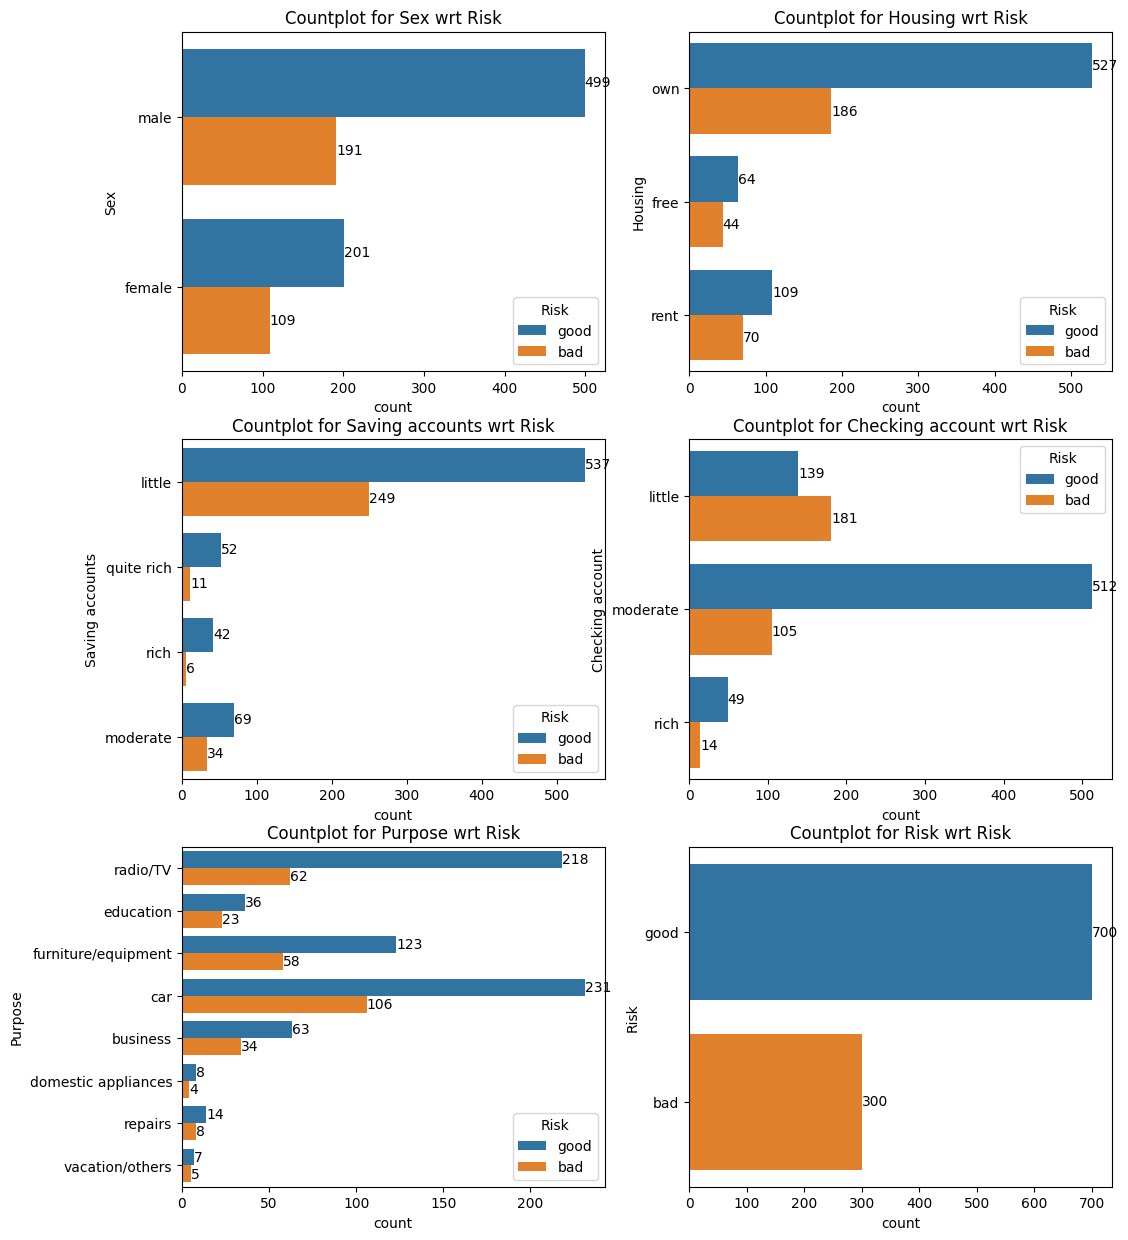

In [28]:
plt.figure(figsize=(12,15))
for i in range(len(cat_feat)):
    plt.subplot(3,2,i+1)
    ax = sns.countplot(y=df[cat_feat[i]],hue=df['Risk'])
    plt.title(f'Countplot for {cat_feat[i]} wrt Risk')
    for i in ax.containers:
        ax.bar_label(i)
plt.show()

#### Univariate - num

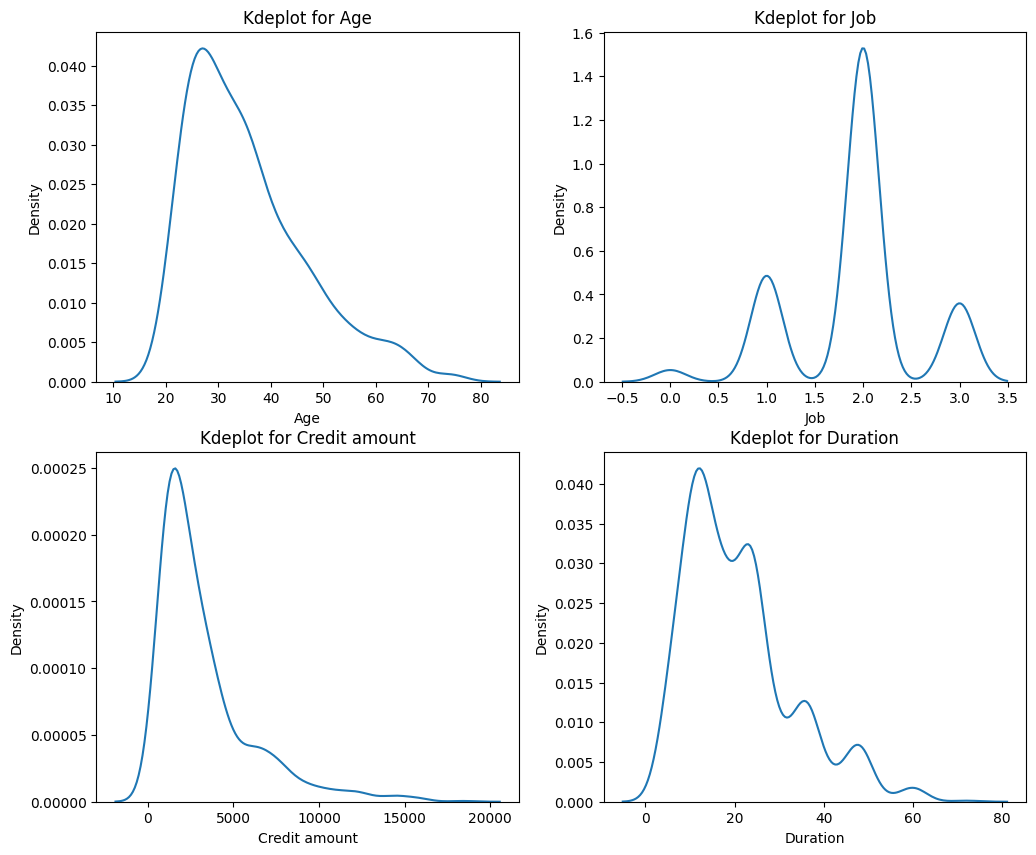

In [29]:
plt.figure(figsize=(12,10))
for i in range(len(num_feat)):
    plt.subplot(2,2,i+1)
    sns.kdeplot(x=df[num_feat[i]])
    plt.title(f'Kdeplot for {num_feat[i]}')
plt.show()

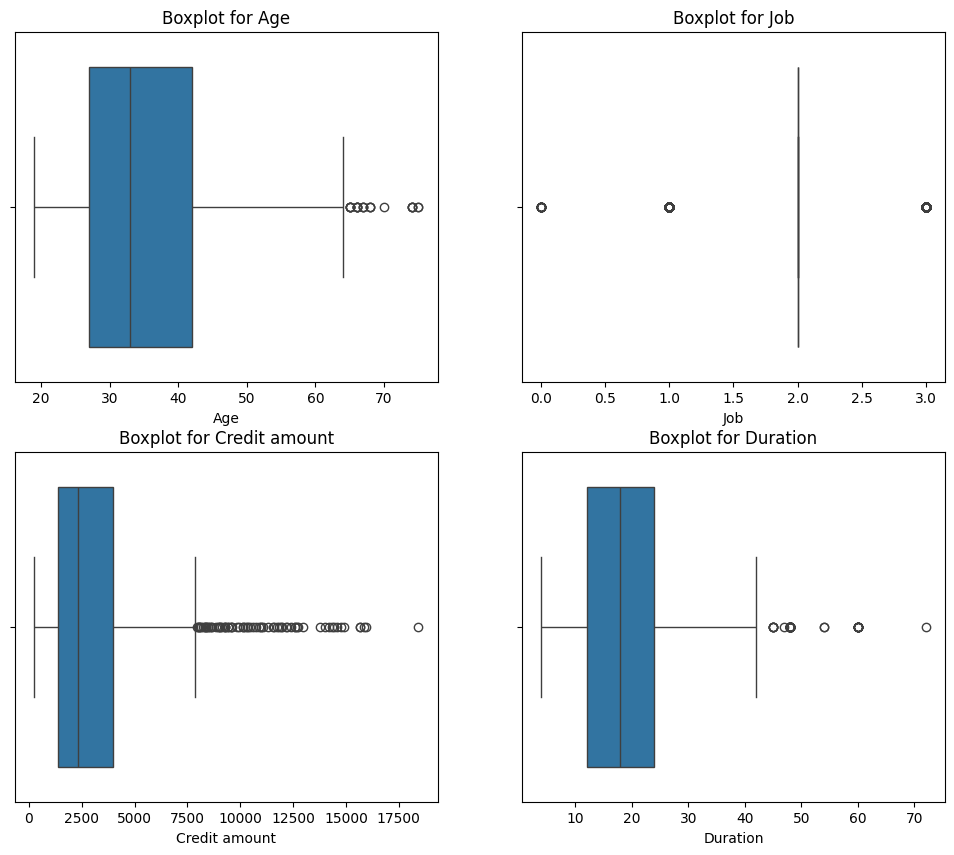

In [30]:
plt.figure(figsize=(12,10))
for i in range(len(num_feat)):
    plt.subplot(2,2,i+1)
    sns.boxplot(x=df[num_feat[i]])
    plt.title(f'Boxplot for {num_feat[i]}')
plt.show()

#### Bi-variate Analysis - Num- cat

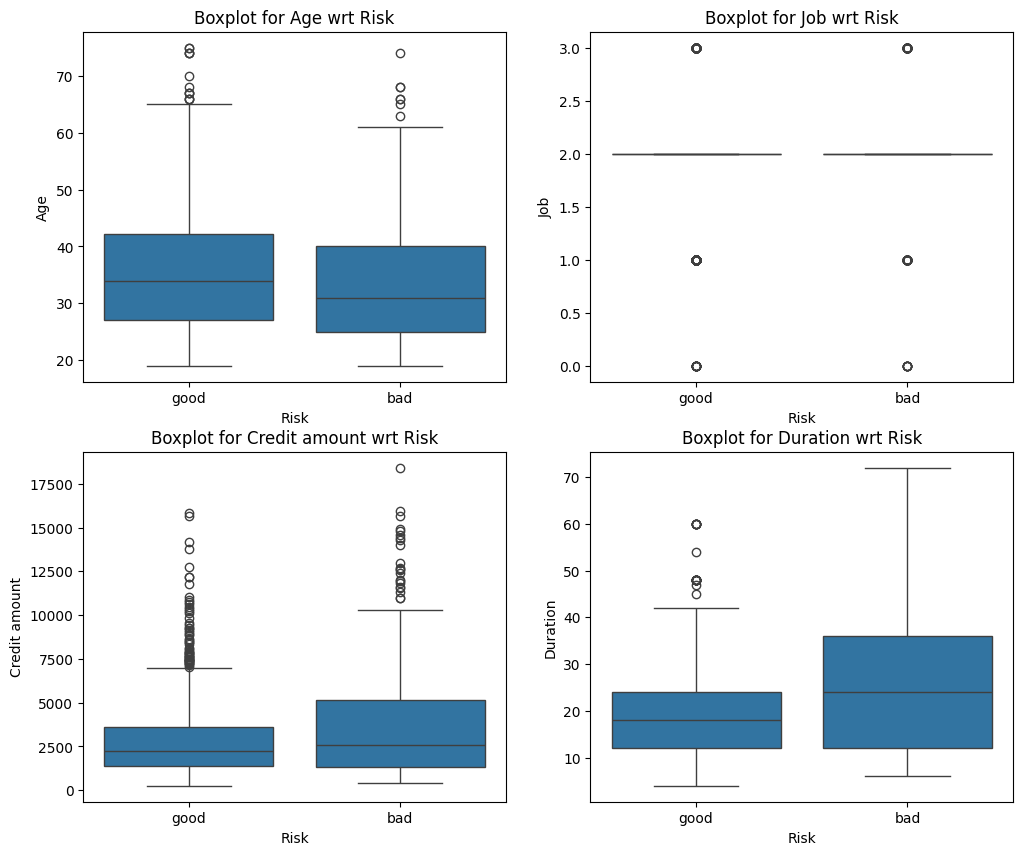

In [31]:
plt.figure(figsize=(12,10))
for i in range(len(num_feat)):
    plt.subplot(2,2,i+1)
    sns.boxplot(x=df['Risk'],y=df[num_feat[i]])
    plt.title(f'Boxplot for {num_feat[i]} wrt Risk')
plt.show()

#### Binning

In [32]:
df.describe()

,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.546000,1.904000,3271.258000,20.903000
std,11.375469,0.653614,2822.736876,12.058814
min,19.000000,0.000000,250.000000,4.000000
25%,27.000000,2.000000,1365.500000,12.000000
50%,33.000000,2.000000,2319.500000,18.000000
75%,42.000000,2.000000,3972.250000,24.000000
max,75.000000,3.000000,18424.000000,72.000000


In [33]:
df['Age_Grp'] = pd.cut(df['Age'],bins=[15,25,35,45,60,75])
df['Age_Grp'].value_counts()

(25, 35]    398
(35, 45]    226
(15, 25]    190
(45, 60]    141
(60, 75]     45
Name: Age_Grp, dtype: int64

In [34]:
df.groupby(['Age_Grp','Risk'])['Risk'].count()

Age_Grp   Risk
(15, 25]  bad      80
          good    110
(25, 35]  bad     118
          good    280
(35, 45]  bad      55
          good    171
(45, 60]  bad      37
          good    104
(60, 75]  bad      10
          good     35
Name: Risk, dtype: int64

In [35]:
df.columns

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Purpose', 'Risk', 'Age_Grp'],
      dtype='object')

In [36]:
cols = ['Credit amount','Age','Duration']

a1 = df[cols].describe(percentiles=[0.01,0.02,0.05,0.95,0.98,0.99]).T
a1 = a1.iloc[:,3:]
a1

,min,1%,2%,5%,50%,95%,98%,99%,max
Credit amount,250.0,425.83,570.02,708.95,2319.5,9162.7,12169.7,14180.39,18424.0
Age,19.0,20.00,21.00,22.00,33.0,60.0,65.0,67.01,75.0
Duration,4.0,6.00,6.00,6.00,18.0,48.0,48.0,60.00,72.0


In [37]:
df1 = df.copy()

In [38]:
for i in cols:
    q1 = df[i].quantile(0.25)
    q3 = df[i].quantile(0.75)
    iqr = q3 - q1
    upper = q3 + 1.5*iqr
    lower = q1 - 1.5*iqr
#     print(i,'q1',q1,'q3',q3,'upper',upper,'lower',lower)
    df[i] = np.where(df[i]>upper,upper,df[i])
    df[i] = np.where(df[i]<lower,lower,df[i])

In [39]:
cols = ['Credit amount','Age','Duration']

a1 = df[cols].describe(percentiles=[0.01,0.02,0.05,0.95,0.98,0.99]).T
a1 = a1.iloc[:,3:]
a1

,min,1%,2%,5%,50%,95%,98%,99%,max
Credit amount,250.0,425.83,570.02,708.95,2319.5,7882.375,7882.375,7882.375,7882.375
Age,19.0,20.00,21.00,22.00,33.0,60.000,64.500,64.500,64.500
Duration,4.0,6.00,6.00,6.00,18.0,42.000,42.000,42.000,42.000


#### Encoding

In [40]:
cat_feat

Index(['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose',
       'Risk'],
      dtype='object')

In [41]:
df_dum = pd.get_dummies(data=df,columns=cat_feat[:-1],dtype=int,drop_first=True)
print(df_dum.shape)
print(df_dum.columns)

(1000, 21)
Index(['Age', 'Job', 'Credit amount', 'Duration', 'Risk', 'Age_Grp',
       'Sex_male', 'Housing_own', 'Housing_rent', 'Saving accounts_moderate',
       'Saving accounts_quite rich', 'Saving accounts_rich',
       'Checking account_moderate', 'Checking account_rich', 'Purpose_car',
       'Purpose_domestic appliances', 'Purpose_education',
       'Purpose_furniture/equipment', 'Purpose_radio/TV', 'Purpose_repairs',
       'Purpose_vacation/others'],
      dtype='object')


In [42]:
df['Risk'].value_counts()

good    700
bad     300
Name: Risk, dtype: int64

In [43]:
df_dum['Risk'] = df_dum['Risk'].replace({'good':0,'bad':1})

# actual = bad, pred = good
# actual = good, pred = bad

#### Select x and y

In [44]:
x = df_dum.drop(['Risk','Age_Grp'],axis=1)
y = df_dum['Risk']
print(x.shape)
print(y.shape)

(1000, 19)
(1000,)


In [45]:
x.columns

Index(['Age', 'Job', 'Credit amount', 'Duration', 'Sex_male', 'Housing_own',
       'Housing_rent', 'Saving accounts_moderate',
       'Saving accounts_quite rich', 'Saving accounts_rich',
       'Checking account_moderate', 'Checking account_rich', 'Purpose_car',
       'Purpose_domestic appliances', 'Purpose_education',
       'Purpose_furniture/equipment', 'Purpose_radio/TV', 'Purpose_repairs',
       'Purpose_vacation/others'],
      dtype='object')

#### Split data into train and test

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)
print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

(700, 19) (300, 19)
(700,) (300,)


In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import *

In [49]:
def eval_model(ytest,ypred):
    print(confusion_matrix(ytest,ypred))
    print(classification_report(ytest,ypred))

#### 1) LogReg

In [50]:
lr1 = LogisticRegression(max_iter=10000)
lr1.fit(x_train,y_train)

LogisticRegression(max_iter=10000)

In [51]:
print('Train Score',lr1.score(x_train,y_train))
print('Test Score',lr1.score(x_test,y_test))

Train Score 0.7614285714285715
Test Score 0.7633333333333333


In [52]:
ypred_lr1 = lr1.predict(x_test)
eval_model(y_test,ypred_lr1)
# [TN FP]
# [FN TP]

# FN = actual = bad, pred = good
# FP = actual = good, pred = bad

[[191  18]
 [ 53  38]]
              precision    recall  f1-score   support

           0       0.78      0.91      0.84       209
           1       0.68      0.42      0.52        91

    accuracy                           0.76       300
   macro avg       0.73      0.67      0.68       300
weighted avg       0.75      0.76      0.74       300



#### 2) DT Cls

In [53]:
dt1 = DecisionTreeClassifier(criterion='gini')
dt1.fit(x_train,y_train)

print('Train Score',dt1.score(x_train,y_train))
print('Test Score',dt1.score(x_test,y_test))

Train Score 1.0
Test Score 0.6966666666666667


In [81]:
ypred_dt1  = dt1.predict(x_test)
eval_model(y_test,ypred_dt1)

[[164  45]
 [ 46  45]]
              precision    recall  f1-score   support

           0       0.78      0.78      0.78       209
           1       0.50      0.49      0.50        91

    accuracy                           0.70       300
   macro avg       0.64      0.64      0.64       300
weighted avg       0.70      0.70      0.70       300



#### Inference
Model is highly overfit

In [55]:
from sklearn.tree import plot_tree, export_text

In [56]:
fn = x_train.columns
cn = ['0','1']

In [63]:
print(dt1.get_depth())
print(dt1.get_params())

14
{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}


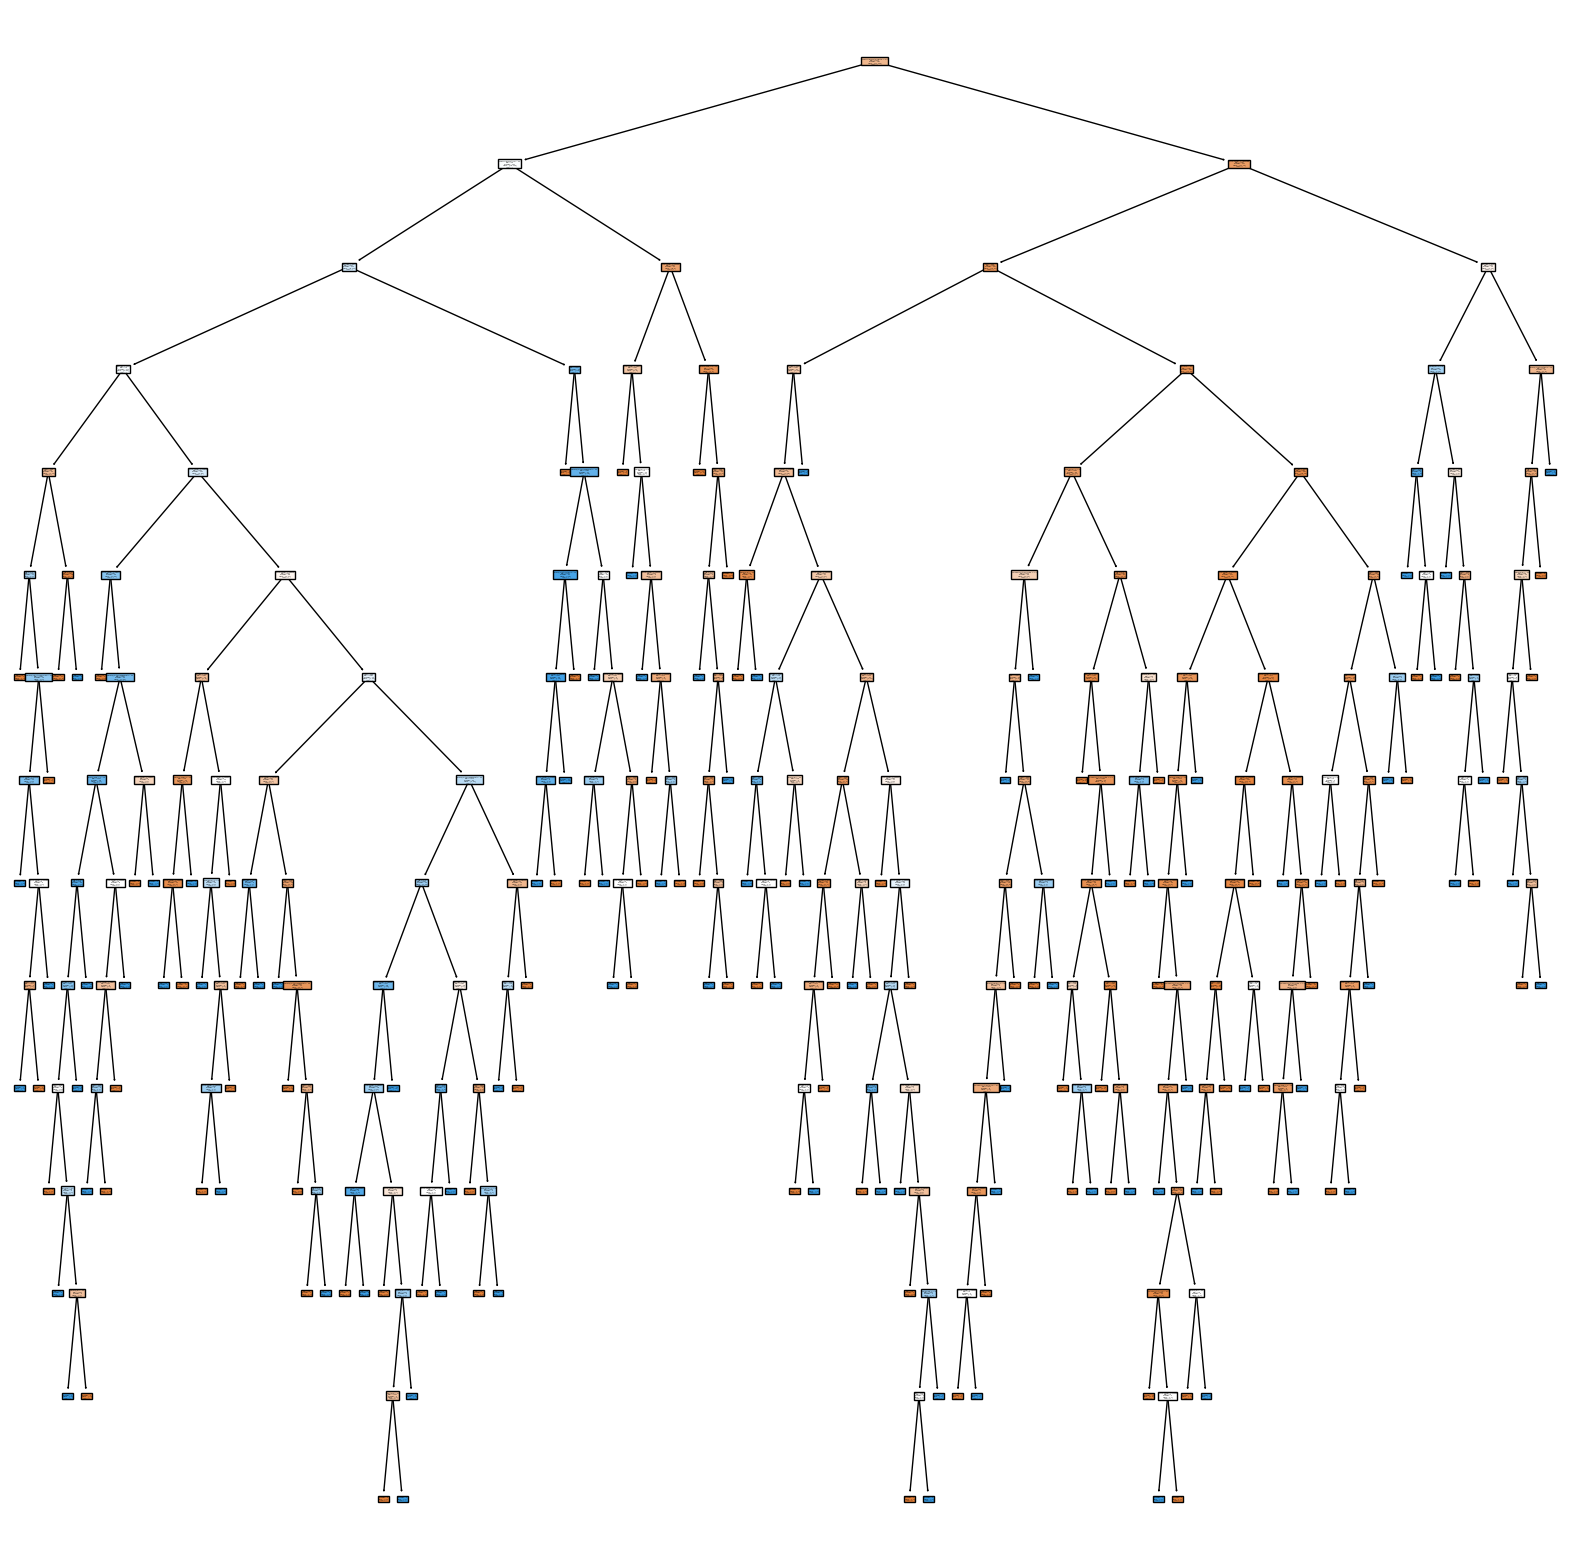

In [60]:
plt.figure(figsize=(20,20))
plot_tree(dt1,feature_names=fn,class_names=cn,filled=True)
plt.show()

### Decision Rules

In [61]:
print(export_text(dt1,feature_names=x_train.columns.tolist()))

|--- Checking account_moderate <= 0.50
|   |--- Checking account_rich <= 0.50
|   |   |--- Duration <= 33.00
|   |   |   |--- Duration <= 11.50
|   |   |   |   |--- Age <= 35.50
|   |   |   |   |   |--- Job <= 0.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- Job >  0.50
|   |   |   |   |   |   |--- Purpose_domestic appliances <= 0.50
|   |   |   |   |   |   |   |--- Credit amount <= 1717.50
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- Credit amount >  1717.50
|   |   |   |   |   |   |   |   |--- Credit amount <= 2173.00
|   |   |   |   |   |   |   |   |   |--- Age <= 22.00
|   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |--- Age >  22.00
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- Credit amount >  2173.00
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- Purpose_domestic appliances >  0.50
|   |   |   |   |   |   |   

### Hyperparameter Tuning

In [62]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV 

In [70]:
hparams = {'criterion':['gini','entropy'],
          'max_depth': [5,6,7,8,9,10],
          'min_samples_split': [7,8,9,10,12],
          'min_samples_leaf': [7,8,9,10]}

print(2*6*5*4)

240


In [72]:
dt_base = DecisionTreeClassifier(random_state=50)
# cv = cross validation
gs_cv = GridSearchCV(dt_base,param_grid=hparams,cv=5,scoring='accuracy')
gs_cv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=50),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 6, 7, 8, 9, 10],
                         'min_samples_leaf': [7, 8, 9, 10],
                         'min_samples_split': [7, 8, 9, 10, 12]},
             scoring='accuracy')

In [77]:
print(gs_cv.best_score_)
print(gs_cv.best_params_)

0.7242857142857144
{'criterion': 'entropy', 'max_depth': 9, 'min_samples_leaf': 8, 'min_samples_split': 7}


#### DT after Hyparmeter Tuning

In [78]:
dt2 = DecisionTreeClassifier(**gs_cv.best_params_)  # kwargs
dt2.fit(x_train,y_train)

print('Train Score',dt2.score(x_train,y_train))
print('Test Score',dt2.score(x_test,y_test))

Train Score 0.8214285714285714
Test Score 0.73


In [79]:
ypred_dt2 = dt2.predict(x_test)
eval_model(y_test,ypred_dt2)

[[190  19]
 [ 62  29]]
              precision    recall  f1-score   support

           0       0.75      0.91      0.82       209
           1       0.60      0.32      0.42        91

    accuracy                           0.73       300
   macro avg       0.68      0.61      0.62       300
weighted avg       0.71      0.73      0.70       300



#### Grid Search Results

In [83]:
gs_res = pd.DataFrame(gs_cv.cv_results_)
print(gs_res.shape)
gs_res.head()

(240, 17)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.006380,0.001046,0.003616,0.000821,gini,5,7,7,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.75,0.7,0.707143,0.692857,0.7,0.71,0.020504,106
1,0.005757,0.001762,0.002913,0.000374,gini,5,7,8,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.75,0.7,0.707143,0.692857,0.7,0.71,0.020504,106
2,0.007312,0.002558,0.003628,0.000455,gini,5,7,9,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.75,0.7,0.707143,0.692857,0.7,0.71,0.020504,106
3,0.005719,0.001341,0.002741,0.000580,gini,5,7,10,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.75,0.7,0.707143,0.692857,0.7,0.71,0.020504,106
4,0.006789,0.000379,0.004179,0.000739,gini,5,7,12,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.75,0.7,0.707143,0.692857,0.7,0.71,0.020504,106


In [85]:
gs_res.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_criterion', 'param_max_depth', 'param_min_samples_leaf',
       'param_min_samples_split', 'params', 'split0_test_score',
       'split1_test_score', 'split2_test_score', 'split3_test_score',
       'split4_test_score', 'mean_test_score', 'std_test_score',
       'rank_test_score'],
      dtype='object')

In [87]:
gs_res = gs_res[['param_criterion','param_max_depth','param_min_samples_leaf',
        'param_min_samples_split','mean_test_score','rank_test_score']]
gs_res.head(20)

,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,mean_test_score,rank_test_score
0,gini,5,7,7,0.710000,106
1,gini,5,7,8,0.710000,106
2,gini,5,7,9,0.710000,106
3,gini,5,7,10,0.710000,106
4,gini,5,7,12,0.710000,106
5,gini,5,8,7,0.710000,106
6,gini,5,8,8,0.710000,106
7,gini,5,8,9,0.710000,106
8,gini,5,8,10,0.710000,106
9,gini,5,8,12,0.710000,106


In [88]:
gs_res.sort_values('rank_test_score').head(10)

,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,mean_test_score,rank_test_score
206,entropy,9,8,8,0.724286,1
209,entropy,9,8,12,0.724286,1
208,entropy,9,8,10,0.724286,1
207,entropy,9,8,9,0.724286,1
205,entropy,9,8,7,0.724286,1
220,entropy,10,7,7,0.722857,6
221,entropy,10,7,8,0.722857,6
222,entropy,10,7,9,0.722857,6
223,entropy,10,7,10,0.722857,6
224,entropy,10,7,12,0.722857,6


#### 2) RandomizedSearchCV

In [94]:
dt_base2  = DecisionTreeClassifier(random_state=85)

# n_iter = 10 (by default)
rs_cv = RandomizedSearchCV(dt_base2, param_distributions=hparams,n_iter=35,
                           scoring='accuracy',cv=5)
rs_cv.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=85),
                   n_iter=35,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [5, 6, 7, 8, 9, 10],
                                        'min_samples_leaf': [7, 8, 9, 10],
                                        'min_samples_split': [7, 8, 9, 10, 12]},
                   scoring='accuracy')

In [96]:
print(rs_cv.best_score_)
print(rs_cv.best_params_)

0.7271428571428572
{'min_samples_split': 10, 'min_samples_leaf': 8, 'max_depth': 10, 'criterion': 'entropy'}


In [97]:
rs_res = pd.DataFrame(rs_cv.cv_results_)
print(rs_res.shape)
rs_res.head()

(35, 17)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,param_min_samples_leaf,param_max_depth,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.007072,0.000644,0.002734,0.000495,10,8,10,gini,"{'min_samples_split': 10, 'min_samples_leaf': ...",0.750000,0.7,0.742857,0.714286,0.671429,0.715714,0.028714,6
1,0.008760,0.001183,0.004909,0.001574,8,8,6,gini,"{'min_samples_split': 8, 'min_samples_leaf': 8...",0.764286,0.7,0.700000,0.707143,0.692857,0.712857,0.026108,10
2,0.007029,0.001470,0.003531,0.000716,8,8,6,entropy,"{'min_samples_split': 8, 'min_samples_leaf': 8...",0.778571,0.7,0.692857,0.692857,0.707143,0.714286,0.032576,8
3,0.007811,0.000790,0.004041,0.000639,12,7,7,gini,"{'min_samples_split': 12, 'min_samples_leaf': ...",0.757143,0.7,0.692857,0.700000,0.671429,0.704286,0.028428,27
4,0.006377,0.000489,0.003553,0.000476,12,8,5,gini,"{'min_samples_split': 12, 'min_samples_leaf': ...",0.742857,0.7,0.707143,0.692857,0.700000,0.708571,0.017728,15


In [98]:
rs_res = rs_res[['param_criterion','param_max_depth','param_min_samples_leaf',
        'param_min_samples_split','mean_test_score','rank_test_score']]
rs_res = rs_res.sort_values('rank_test_score')
rs_res.head(10)

,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,mean_test_score,rank_test_score
20,entropy,10,8,10,0.727143,1
10,entropy,10,9,7,0.720000,2
25,entropy,9,10,12,0.718571,3
11,entropy,6,7,8,0.717143,4
29,gini,6,7,10,0.715714,5
0,gini,10,8,10,0.715714,6
17,gini,10,8,7,0.715714,6
2,entropy,6,8,8,0.714286,8
19,entropy,6,8,7,0.714286,8
26,gini,6,8,9,0.712857,10


#### DT after Randomized Search

In [100]:
dt3 = DecisionTreeClassifier(**rs_cv.best_params_)
dt3.fit(x_train,y_train)

print('Train Score',dt3.score(x_train,y_train))
print('Test Score',dt3.score(x_test,y_test))

Train Score 0.8214285714285714
Test Score 0.73


In [101]:
ypred_dt3 = dt3.predict(x_test)
eval_model(y_test,ypred_dt3)

[[190  19]
 [ 62  29]]
              precision    recall  f1-score   support

           0       0.75      0.91      0.82       209
           1       0.60      0.32      0.42        91

    accuracy                           0.73       300
   macro avg       0.68      0.61      0.62       300
weighted avg       0.71      0.73      0.70       300



#### Hyperparameter Tuning from scratch

In [103]:
from itertools import product

In [104]:
crit = ['gini','entropy']
max_depth = list(range(5,12))
mss = list(range(5,13))

print(len(crit)*len(max_depth)*len(mss))

112


In [106]:
comb = list(product(crit,max_depth,mss))
print(len(comb))
print(comb[:15])

112
[('gini', 5, 5), ('gini', 5, 6), ('gini', 5, 7), ('gini', 5, 8), ('gini', 5, 9), ('gini', 5, 10), ('gini', 5, 11), ('gini', 5, 12), ('gini', 6, 5), ('gini', 6, 6), ('gini', 6, 7), ('gini', 6, 8), ('gini', 6, 9), ('gini', 6, 10), ('gini', 6, 11)]


In [107]:
from sklearn.metrics import *

In [114]:
score_res = []
for i, j, k in comb:
    model = DecisionTreeClassifier(criterion=i,max_depth=j,min_samples_split=k)
    model.fit(x_train,y_train)
    ypred = model.predict(x_test)
    tr_acc = model.score(x_train,y_train)
    te_acc = model.score(x_test,y_test)
    rec1 = recall_score(y_test,ypred,pos_label=1)
    rec0 = recall_score(y_test,ypred,pos_label=0)
    pre1 = precision_score(y_test,ypred,pos_label=1)
    pre0 = precision_score(y_test,ypred,pos_label=0)
    res = {'Criterion':i,'Max_Depth':j,'MSS':k,'Train_Score':tr_acc,'Test_score':te_acc,
           'Rec1':rec1,'Rec0':rec0,'Pre1':pre1,'Pre0':pre0}
    score_res.append(res)
scores_df = pd.DataFrame(score_res)
scores_df.head(1)

,Criterion,Max_Depth,MSS,Train_Score,Test_score,Rec1,Rec0,Pre1,Pre0
0,gini,5,5,0.801429,0.726667,0.21978,0.947368,0.645161,0.736059


In [113]:
scores_df.sort_values('Rec1',ascending=False).head(10)

,Criterion,Max_Depth,MSS,Train_Score,Test_score,Rec1,Rec0,Pre1,Pre0
72,entropy,7,5,0.838571,0.730000,0.560440,0.803828,0.554348,0.807692
73,entropy,7,6,0.835714,0.736667,0.560440,0.813397,0.566667,0.809524
74,entropy,7,7,0.837143,0.726667,0.538462,0.808612,0.550562,0.800948
11,gini,6,8,0.835714,0.720000,0.538462,0.799043,0.538462,0.799043
9,gini,6,6,0.837143,0.723333,0.538462,0.803828,0.544444,0.800000
10,gini,6,7,0.834286,0.723333,0.538462,0.803828,0.544444,0.800000
75,entropy,7,8,0.831429,0.740000,0.538462,0.827751,0.576471,0.804651
105,entropy,11,6,0.921429,0.713333,0.527473,0.794258,0.527473,0.794258
8,gini,6,5,0.835714,0.720000,0.527473,0.803828,0.539326,0.796209
76,entropy,7,9,0.827143,0.736667,0.527473,0.827751,0.571429,0.800926


#### Final Model (Pruned Tree)

In [115]:
dt_final = DecisionTreeClassifier(criterion='entropy',max_depth=7,min_samples_split=5)
dt_final.fit(x_train,y_train)

print('Train Score',dt_final.score(x_train,y_train))
print('Test Score',dt_final.score(x_test,y_test))

Train Score 0.8357142857142857
Test Score 0.7366666666666667


In [116]:
ypred_dt_final  = dt_final.predict(x_test)
eval_model(y_test,ypred_dt_final)

[[170  39]
 [ 40  51]]
              precision    recall  f1-score   support

           0       0.81      0.81      0.81       209
           1       0.57      0.56      0.56        91

    accuracy                           0.74       300
   macro avg       0.69      0.69      0.69       300
weighted avg       0.74      0.74      0.74       300



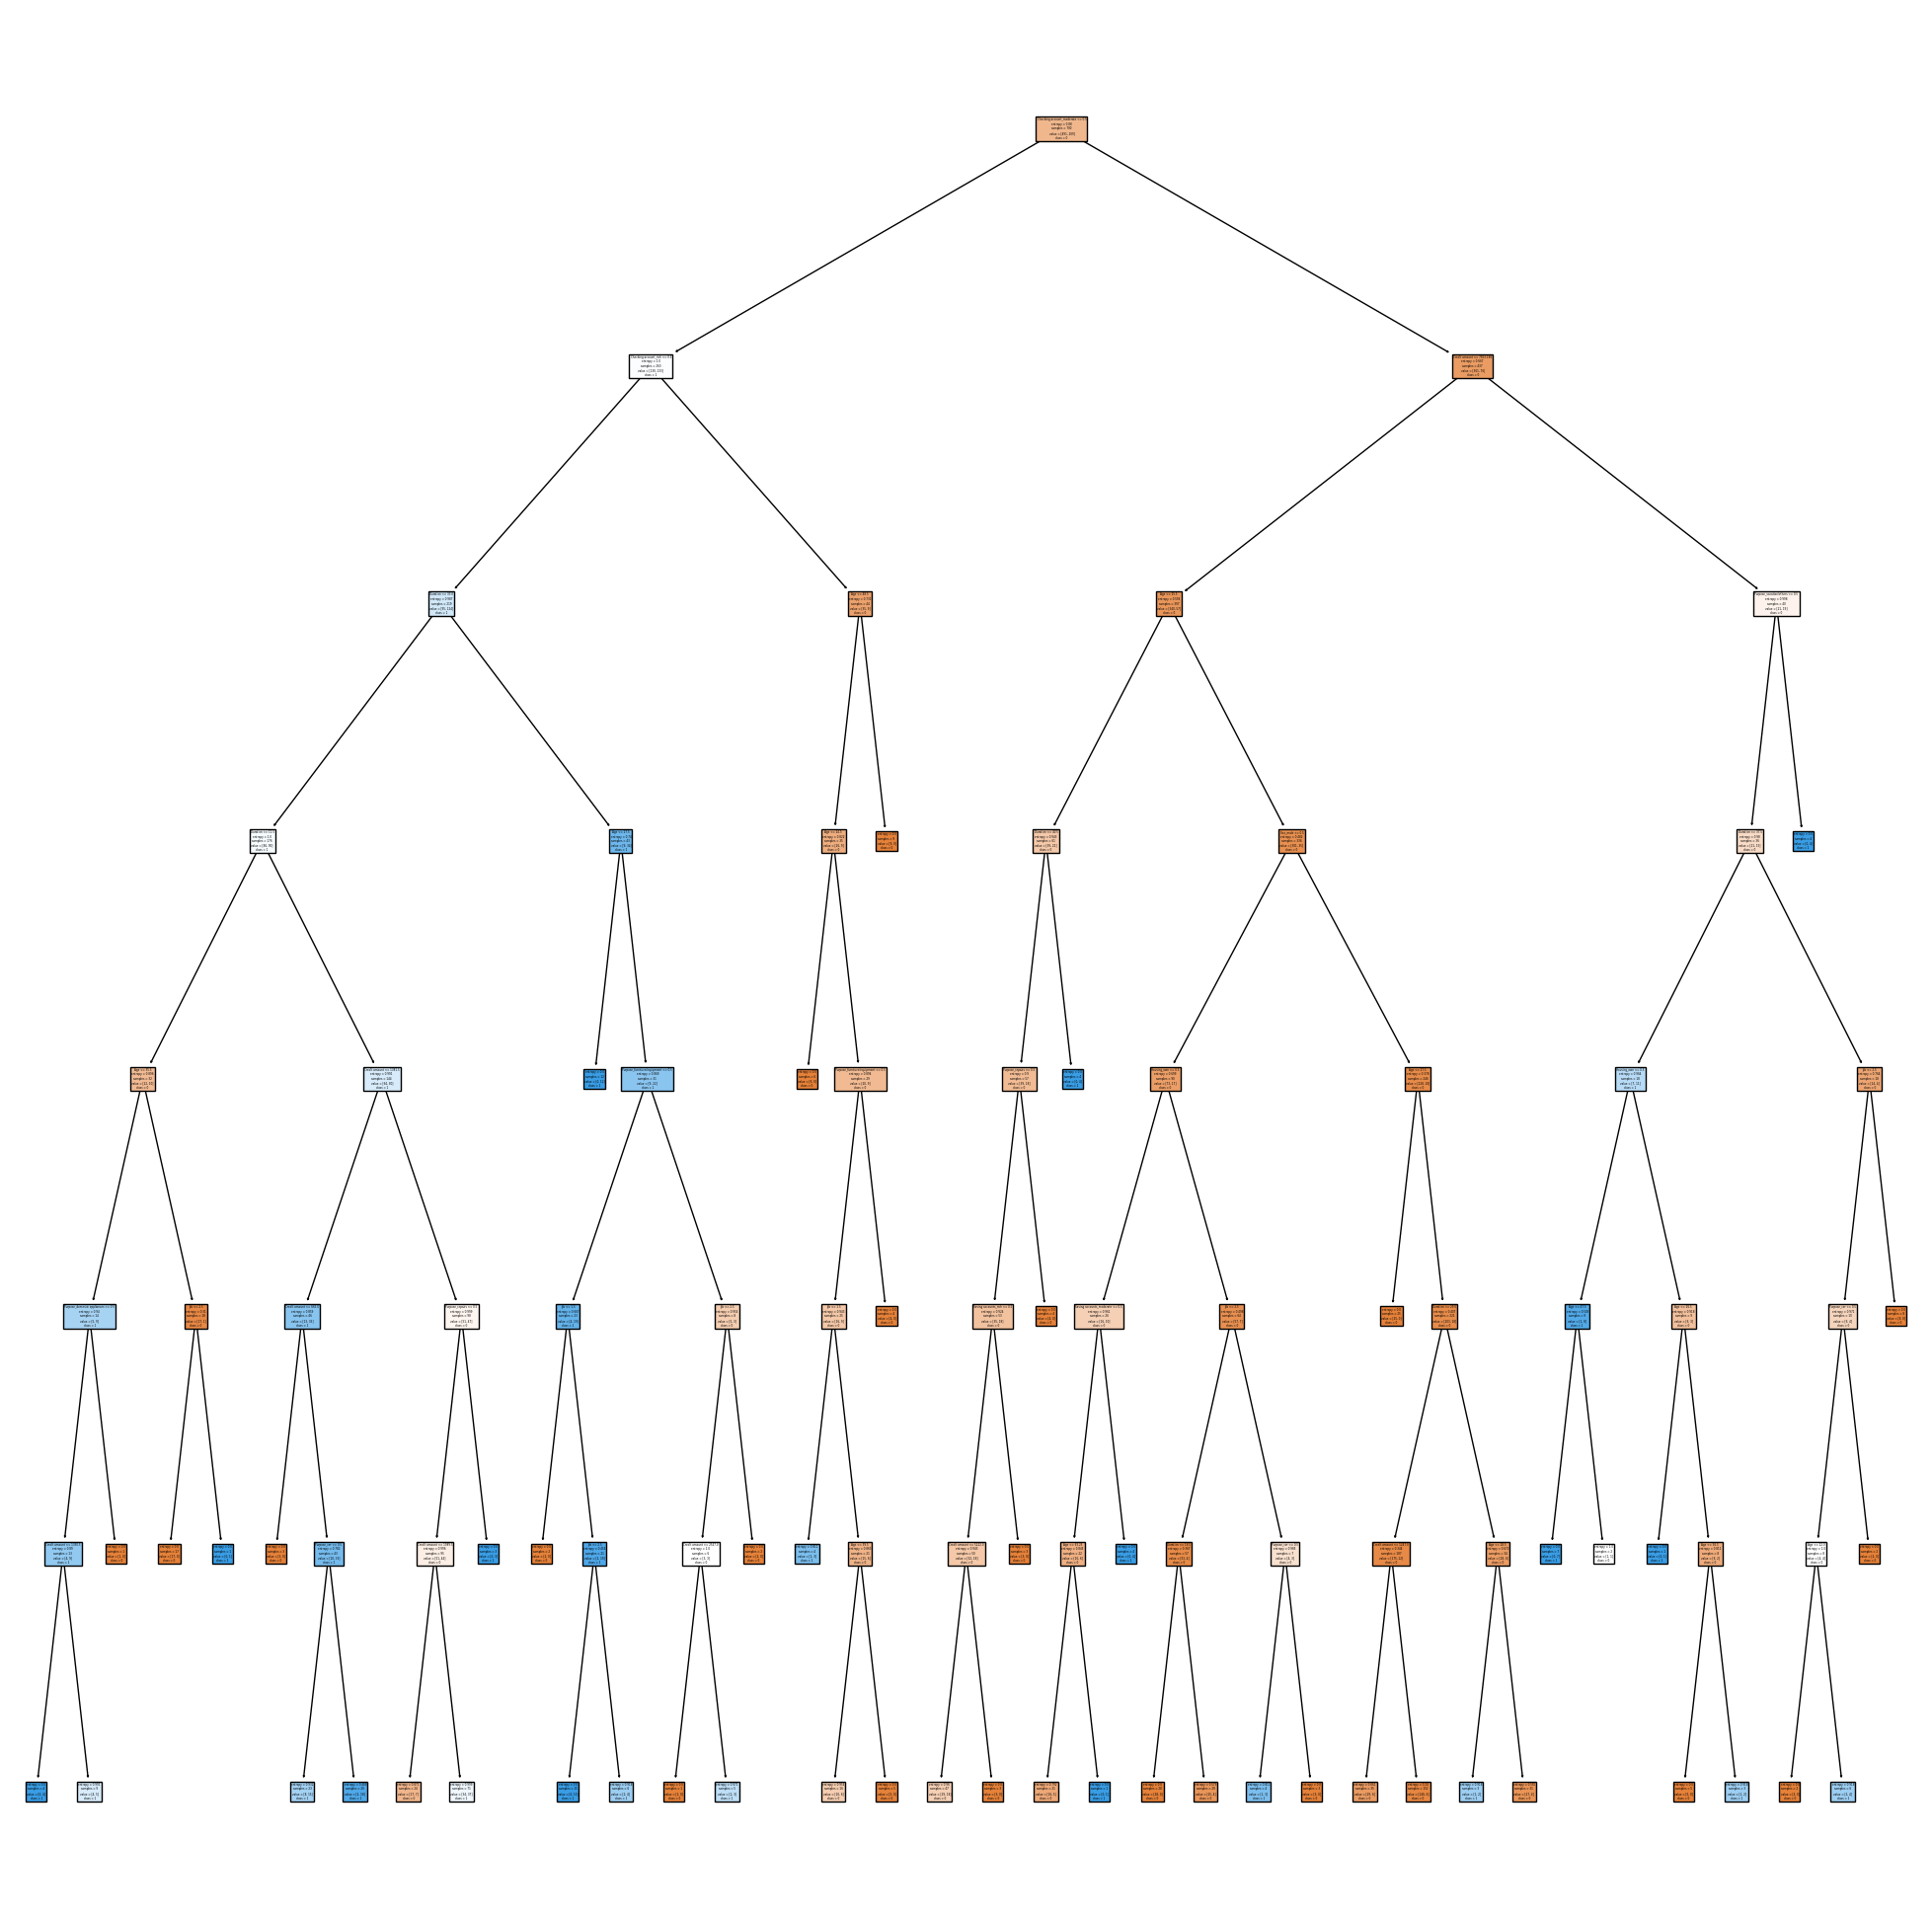

In [117]:
plt.figure(figsize=(25,25))
plot_tree(dt_final,feature_names=fn,class_names=cn,filled=True)
plt.show()

#### Decision Rules

In [118]:
print(export_text(dt_final,feature_names=x_train.columns.tolist()))

|--- Checking account_moderate <= 0.50
|   |--- Checking account_rich <= 0.50
|   |   |--- Duration <= 33.00
|   |   |   |--- Duration <= 11.50
|   |   |   |   |--- Age <= 35.50
|   |   |   |   |   |--- Purpose_domestic appliances <= 0.50
|   |   |   |   |   |   |--- Credit amount <= 1330.50
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- Credit amount >  1330.50
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- Purpose_domestic appliances >  0.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- Age >  35.50
|   |   |   |   |   |--- Job <= 2.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- Job >  2.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |--- Duration >  11.50
|   |   |   |   |--- Credit amount <= 1381.50
|   |   |   |   |   |--- Credit amount <= 663.00
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- Credit amount >  663.00
|   |   |   |   |   |   |--- Purpose_car <= 0.50
|   |   |   |   |   

#### Featuure Imp

In [119]:
x_train.shape

(700, 19)

In [120]:
fimp = pd.DataFrame({'Feature':x_train.columns,'FImp':dt_final.feature_importances_})
fimp = fimp.sort_values('FImp',ascending=False)
fimp

,Feature,FImp
10,Checking account_moderate,0.216485
0,Age,0.205682
2,Credit amount,0.141883
3,Duration,0.107151
1,Job,0.096434
11,Checking account_rich,0.051446
5,Housing_own,0.037427
12,Purpose_car,0.028865
7,Saving accounts_moderate,0.022543
15,Purpose_furniture/equipment,0.022291
